# Understanding TF-IDF in Natural Language Processing
This notebook covers:
1. What TF-IDF is and its importance in NLP.
2. The mathematics behind TF-IDF.
3. A manual implementation of TF-IDF in Python.
4. Using Scikit-learn's `TfidfVectorizer`.
5. Applications and visualizations.

In [4]:
from collections import Counter
import math
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pandas as pd

## Section 1: What is TF-IDF?
TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a numerical statistic that reflects how important a word is to a document in a collection or corpus.

In [17]:
documents = [
    "TF-IDF stands for Term Frequency-Inverse Document Frequency.",
    "It is a statistical measure used in information retrieval and text mining.",
    "TF measures how frequently a term occurs in a document.",
    "IDF measures how important a term is across all documents.",
    "TF-IDF is often used in search engines and for document similarity tasks.",
]

## Mathematics of TF-IDF
**TF (Term Frequency):** Measures how frequently a term occurs in a document.

**IDF (Inverse Document Frequency):** Measures how unique or important a term is across all documents.

In [18]:
preprocessed_docs = [doc.lower() for doc in documents]

In [19]:
def compute_tf(doc):
    words = doc.split()
    tf = Counter(words)
    total_words = len(words)
    return {word: count / total_words for word, count in tf.items()}

In [20]:
def compute_idf(docs):
    n_docs = len(docs)
    all_words = set(word for doc in docs for word in doc.split())
    idf = {}
    for word in all_words:
        containing_docs = sum(1 for doc in docs if word in doc.split())
        idf[word] = math.log(n_docs / (1 + containing_docs))  # Add 1 to avoid division by zero
    return idf

In [21]:
tf_list = [compute_tf(doc) for doc in preprocessed_docs]
idf = compute_idf(preprocessed_docs)

In [22]:
idf

{'search': 0.9162907318741551,
 'measure': 0.9162907318741551,
 'document.': 0.9162907318741551,
 'idf': 0.9162907318741551,
 'all': 0.9162907318741551,
 'measures': 0.5108256237659907,
 'text': 0.9162907318741551,
 'across': 0.9162907318741551,
 'and': 0.5108256237659907,
 'frequency-inverse': 0.9162907318741551,
 'information': 0.9162907318741551,
 'tf-idf': 0.5108256237659907,
 'used': 0.5108256237659907,
 'term': 0.22314355131420976,
 'is': 0.22314355131420976,
 'mining.': 0.9162907318741551,
 'similarity': 0.9162907318741551,
 'a': 0.22314355131420976,
 'tasks.': 0.9162907318741551,
 'in': 0.22314355131420976,
 'it': 0.9162907318741551,
 'frequently': 0.9162907318741551,
 'frequency.': 0.9162907318741551,
 'document': 0.5108256237659907,
 'often': 0.9162907318741551,
 'stands': 0.9162907318741551,
 'tf': 0.9162907318741551,
 'how': 0.5108256237659907,
 'engines': 0.9162907318741551,
 'retrieval': 0.9162907318741551,
 'documents.': 0.9162907318741551,
 'statistical': 0.916290731874

In [23]:
tf_idf_list = []
for tf in tf_list:
    tf_idf = {word: tf[word] * idf[word] for word in tf.keys()}
    tf_idf_list.append(tf_idf)

In [24]:
tf_idf_list

[{'tf-idf': 0.07297508910942724,
  'stands': 0.13089867598202215,
  'for': 0.07297508910942724,
  'term': 0.03187765018774425,
  'frequency-inverse': 0.13089867598202215,
  'document': 0.07297508910942724,
  'frequency.': 0.13089867598202215},
 {'it': 0.07635756098951292,
  'is': 0.018595295942850813,
  'a': 0.018595295942850813,
  'statistical': 0.07635756098951292,
  'measure': 0.07635756098951292,
  'used': 0.04256880198049923,
  'in': 0.018595295942850813,
  'information': 0.07635756098951292,
  'retrieval': 0.07635756098951292,
  'and': 0.04256880198049923,
  'text': 0.07635756098951292,
  'mining.': 0.07635756098951292},
 {'tf': 0.09162907318741552,
  'measures': 0.051082562376599076,
  'how': 0.051082562376599076,
  'frequently': 0.09162907318741552,
  'a': 0.04462871026284196,
  'term': 0.02231435513142098,
  'occurs': 0.09162907318741552,
  'in': 0.02231435513142098,
  'document.': 0.09162907318741552},
 {'idf': 0.09162907318741552,
  'measures': 0.051082562376599076,
  'how':

## Exercise

In [25]:
documents = [
    "The Solar System consists of the Sun and the objects that orbit it, including eight planets.",
    "Jupiter is the largest planet in the Solar System and has a Great Red Spot.",
    "Saturn is known for its extensive ring system and is the second-largest planet in the Solar System."
]

Take these documents and calculate their tf-idf using the functions above. Write a function that best fits the document that can answer your query.

## Section 2: Using Scikit-learn's TfidfVectorizer

In [23]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_docs)

sklearn_tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [25]:
sklearn_tfidf_df

,across,all,and,document,documents,engines,for,frequency,frequently,how,...,retrieval,search,similarity,stands,statistical,tasks,term,text,tf,used
0,0.00000,0.00000,0.000000,0.230456,0.00000,0.000000,0.277628,0.688226,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.344113,0.000000,0.000000,0.230456,0.000000,0.230456,0.000000
1,0.00000,0.00000,0.266008,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.329711,0.000000,0.000000,0.000000,0.329711,0.000000,0.000000,0.329711,0.000000,0.266008
2,0.00000,0.00000,0.000000,0.296673,0.00000,0.000000,0.000000,0.000000,0.442986,0.357398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.296673,0.000000,0.296673,0.000000
3,0.38786,0.38786,0.000000,0.000000,0.38786,0.000000,0.000000,0.000000,0.000000,0.312923,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.259754,0.000000,0.000000,0.000000
4,0.00000,0.00000,0.266060,0.220854,0.00000,0.329774,0.266060,0.000000,0.000000,0.000000,...,0.000000,0.329774,0.329774,0.000000,0.000000,0.329774,0.000000,0.000000,0.220854,0.266060


### Visualizing the results

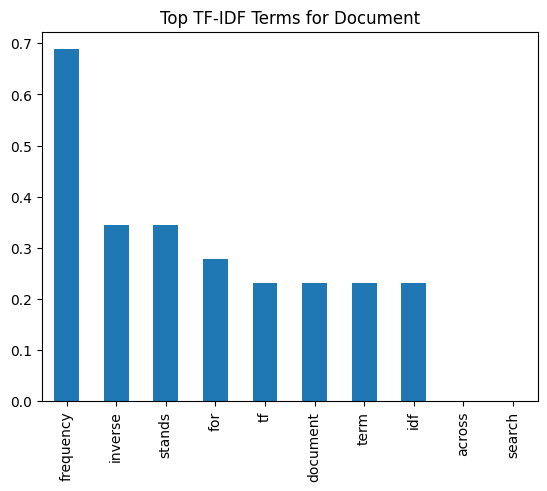

In [17]:
document_idx = 0
tfidf_scores = sklearn_tfidf_df.iloc[document_idx].sort_values(ascending=False).head(10)
tfidf_scores.plot(kind="bar", title="Top TF-IDF Terms for Document")
plt.show()

## Summary
- We manually calculated TF-IDF.
- We used Scikit-learn's `TfidfVectorizer` to streamline the process.
- Visualizations helped interpret the importance of terms within documents.

# Exercise

Exercise: Search Using TF-IDF
Task:
You are given three documents related to the solar system. Your task is to:

1. Preprocess the text.
2. Compute the TF-IDF scores for each word in the documents.
3. Implement a search function where the user inputs a query, and the function returns the document most relevant to the query based on cosine similarity.

In [18]:
documents = [
    "The Solar System consists of the Sun and the objects that orbit it, including eight planets.",
    "Jupiter is the largest planet in the Solar System and has a Great Red Spot.",
    "Saturn is known for its extensive ring system and is the second-largest planet in the Solar System."
]

### Solution

In [19]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

In [20]:
def search(query, tfidf_matrix, vectorizer):
    
    query_vec = vectorizer.transform([query])
    similarities = cosine_similarity(query_vec, tfidf_matrix)    
    most_relevant_idx = np.argmax(similarities)
    
    return most_relevant_idx, similarities[0, most_relevant_idx]

In [21]:
query = "which star has a ring system?"
most_relevant_idx, score = search(query, tfidf_matrix, vectorizer)

print(f"Query: {query}")
print(f"Most relevant document: {documents[most_relevant_idx]}")
print(f"Relevance score: {score:.2f}")

Query: which star has a ring system?
Most relevant document: Saturn is known for its extensive ring system and is the second-largest planet in the Solar System.
Relevance score: 0.29


In [22]:
feature_names = vectorizer.get_feature_names_out()  
df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names, index=[f"Doc {i+1}" for i in range(len(documents))])